importing files

In [0]:
from collections import defaultdict
import random
import time
import pandas as pd
import numpy as np
from scipy import stats
import statistics

Generating Random Graphs

In [0]:
def random_graph_gen(size):
  edges = np.random.randint(0,2,(size,size))
  for i in range(size):
          edges[i][i] = 2  
  for i in range(size):
      for j in range(i,size):
          edges[i][j] = edges[j][i]
  return edges

def graph_numpy_to_dic(adjacency):
  graph = dict()
  for i in range(len(adjacency)):
    lister = []
    for j in range(len(adjacency)):
      if(adjacency[i][j] == 1):
        lister.append(j+1)
    graph[i+1] = lister
  return graph

def graph_gen(size):
  Graph = random_graph_gen(size)
  return graph_numpy_to_dic(Graph)

def get_keys_array(dict):
  result = []
  for key in dict.keys():
      result.append(key)
  return result

NP Algorithm

In [0]:
class Node(object):
  def __init__(self, name, n = []):
      self.name = name
      self.neighbors = n
  def __repr__(self):
      return self.name


def find_cliques(potential_clique=[], remaining_nodes=[], skip_nodes=[], depth=0,all_cliques=[]):

    if len(remaining_nodes) == 0 and len(skip_nodes) == 0:
        #print('This is a clique:', potential_clique)
        all_cliques.append(potential_clique)
        return 1

    found_cliques = 0
    for node in remaining_nodes:

        # Try adding the node to the current potential_clique to see if we can make it work.
        new_potential_clique = potential_clique + [node]
        new_remaining_nodes = [n for n in remaining_nodes if n in node.neighbors]
        new_skip_list = [n for n in skip_nodes if n in node.neighbors]
        found_cliques += find_cliques(new_potential_clique, new_remaining_nodes, new_skip_list, depth + 1,all_cliques)

        # We're done considering this node.  If there was a way to form a clique with it, we
        # already discovered its maximal clique in the recursive call above.  So, go ahead
        # and remove it from the list of remaining nodes and add it to the skip list.
        remaining_nodes.remove(node)
        skip_nodes.append(node)
    return found_cliques

def convert_dict_to_nodes(graph):
  all_nodes = []
  for i in graph:
      all_nodes.append(Node(chr(i+64)))
  for n in all_nodes:
      n.neighbors = []
      for i in graph[ord(n.name)-64]:
          n.neighbors.append(all_nodes[i-1])
  return all_nodes

def np_clique(graph,k):
  myNodes = convert_dict_to_nodes(graph)
  all_cliques = []
  found_cliques = find_cliques(remaining_nodes=myNodes, all_cliques=all_cliques)
  result = 0
  for c in all_cliques:
      if len(c) > result:
          result = len(c)


  if result >= k:
      return True

  return False





P Algorithm

In [0]:
def p_clique(graph,k):
  if k == 1:
      return True
  clique = []
  vertices = get_keys_array(graph)
  max_ln=0
  max_dict=[]
  for i in range(0,len(graph)): 
    clique=[]
    clique.append(vertices[i])
    for v in vertices:            
        if v in clique:             
            continue
        isNext = True
        for u in clique:            
            if u in graph[v]:        
              continue
            else:
              isNext = False
              break
        if isNext:
          clique.append(v)
          if k <= len(clique):
            return True
    if len(clique)>max_ln:
      max_ln=len(clique)
      max_dict=clique
  if k <= len(clique):
    return True
  else :
    return False

Check the results of NP and P algorithm

In [0]:
def check_error(p,np):
  if np==p:
    return "No Error"
  else:
    return "Error"

Generating and Test Graphs 

In [0]:
def generate_sample_error_and_time(input_try_no):
  no_try = []
  no_try1 = []
  for size in graph_size_list:
    size_array = []
    size_array1 = []
    k_list = [ 3, 4, 5, 6]
    for k in k_list:    
      k_array = []
      k_array1 = []
      for z in range (0,input_try_no):
        graph = graph_gen(size)
        start = time.time()
        a = p_clique(graph, k)
        end = time.time()
        x = np_clique(graph, k)
        time_passed = end-start
        k_array1.append(time_passed)
        if check_error(a,x) == "Error":
          Error_graphs.append(graph)
          Error_graphs_len.append(len(graph))
          Error_graphs_k.append(k)
          Error_graphs_p_clique.append(a)
        k_array.append(check_error(a,x))
      size_array1.append(k_array1)
      size_array.append(k_array)
    no_try1.append(size_array1)
    no_try.append(size_array)
  return no_try, no_try1

Statistics for Time Measurement

In [0]:
def getRunningTime(running_times):
  total_time = 0.0
  for j in range (0,len(running_times)):
    total_time = total_time + running_times[j]
  standard_deviation = np.std(running_times)
  size = len(running_times)
  sample_mean_running_time = np.mean(running_times)
  tval_90 = 1.645
  tval_95 = 1.96
  standard_error = stats.sem(running_times)
  upper_mean90 = sample_mean_running_time + (tval_90 * standard_error)
  lower_mean90 = sample_mean_running_time - (tval_90 * standard_error)
  upper_mean95 = sample_mean_running_time + (tval_95 * standard_error)
  lower_mean95 = sample_mean_running_time - (tval_95 * standard_error)
  return standard_deviation,sample_mean_running_time, standard_error, upper_mean90, lower_mean90, upper_mean95, lower_mean95

Run Of Functions

In [0]:
Error_graphs = []
Error_graphs_len = []
Error_graphs_k = []
Error_graphs_p_clique = []
graph_size_list=[10,15,20,30]
number_of_tries=[50,100,250,500]

check_no_try_50, time_no_try_50 = generate_sample_error_and_time(number_of_tries[0])
print("50")
check_no_try_100, time_no_try_100 = generate_sample_error_and_time(number_of_tries[1])
print("100")
check_no_try_250, time_no_try_250 = generate_sample_error_and_time(number_of_tries[2])
print("250")
check_no_try_500,time_no_try_500 = generate_sample_error_and_time(number_of_tries[3])
print("finito")


50
100
250
finito


Detailed Look to Data

In [0]:
#check_no_try_200

Counting Errors For Success Rate

In [0]:
error_no_try_50 = []
number_of_errors = 0
for i in range (0,4):
  error_size=[]
  for j in range (0,4):
    number_of_errors=0
    for u in range (0,50):
      if check_no_try_50[i][j][u] == "Error":
        number_of_errors = number_of_errors + 1
    error_size.append(round(1 - (number_of_errors/50),5))
  error_no_try_50.append(error_size)

error_no_try_100 = []
number_of_errors = 0
for i in range (0,4):
  error_size=[]
  for j in range (0,4):
    number_of_errors=0
    for u in range (0,100):
      if check_no_try_100[i][j][u] == "Error":
        number_of_errors = number_of_errors + 1
    error_size.append(round(1-(number_of_errors/100),5))
  error_no_try_100.append(error_size)

error_no_try_250 = []
number_of_errors = 0
for i in range (0,4):
  error_size=[]
  for j in range (0,4):
    number_of_errors=0
    for u in range (0,250):
      if check_no_try_250[i][j][u] == "Error":
        number_of_errors = number_of_errors + 1
    error_size.append(round(1-(number_of_errors/250),5))
  error_no_try_250.append(error_size)

error_no_try_500 = []
number_of_errors = 0
for i in range (0,4):
  error_size=[]
  for j in range (0,4):
    number_of_errors=0
    for u in range (0,500):
      if check_no_try_500[i][j][u] == "Error":
        number_of_errors = number_of_errors + 1
    error_size.append(round(1-(number_of_errors/500),5))
  error_no_try_500.append(error_size)

display("error_no_try_50")
display(error_no_try_50)
display("error_no_try_100")
display(error_no_try_100)
display("error_no_try_250")
display(error_no_try_250)
display("error_no_try_500")
display(error_no_try_500)

'error_no_try_50'

[[1.0, 0.96, 1.0, 1.0],
 [1.0, 1.0, 0.94, 1.0],
 [1.0, 1.0, 0.96, 0.94],
 [1.0, 1.0, 1.0, 0.9]]

'error_no_try_100'

[[1.0, 0.96, 1.0, 0.99],
 [1.0, 0.99, 0.95, 1.0],
 [1.0, 1.0, 0.97, 0.92],
 [1.0, 1.0, 1.0, 0.86]]

'error_no_try_250'

[[1.0, 0.964, 0.996, 1.0],
 [1.0, 0.996, 0.896, 0.972],
 [1.0, 1.0, 0.928, 0.92],
 [1.0, 1.0, 1.0, 0.88]]

'error_no_try_500'

[[1.0, 0.958, 0.998, 1.0],
 [1.0, 0.99, 0.926, 0.986],
 [1.0, 1.0, 0.942, 0.912],
 [1.0, 1.0, 1.0, 0.862]]

Number of Vertices vs. Success Rate

In [0]:
error_no_try_500 = []
number_of_errors = 0
for i in range (0,4):
  error_size=[]
  number_of_errors=0
  for j in range (0,4):
    for u in range (0,500):
      if check_no_try_500[i][j][u] == "Error":
        number_of_errors = number_of_errors + 1
  error_no_try_500.append(round(1 - (number_of_errors/(500*4)),5))
display(error_no_try_500)

[0.989, 0.9755, 0.9635, 0.9655]

Time Measurement

In [0]:
for i in range (0,4):
  print("Size = ", graph_size_list[i])
  display("TIME_NO_TRY_50")
  display("K=3")
  display(getRunningTime(time_no_try_50[i][0]))
  display("K=4")
  display(getRunningTime(time_no_try_50[i][1]))
  display("K=5")
  display(getRunningTime(time_no_try_50[i][2]))
  display("K=6")
  display(getRunningTime(time_no_try_50[i][3]))

  display("TIME_NO_TRY_100")
  display("K=3")
  display(getRunningTime(time_no_try_100[i][0]))
  display("K=4")
  display(getRunningTime(time_no_try_100[i][1]))
  display("K=5")
  display(getRunningTime(time_no_try_100[i][2]))
  display("K=6")
  display(getRunningTime(time_no_try_100[i][3]))

  display("TIME_NO_TRY_250")
  display("K=3")
  display(getRunningTime(time_no_try_250[i][0]))
  display("K=4")
  display(getRunningTime(time_no_try_250[i][1]))
  display("K=5")
  display(getRunningTime(time_no_try_250[i][2]))
  display("K=6")
  display(getRunningTime(time_no_try_250[i][3]))

  display("TIME_NO_TRY_500")
  display("K=3")
  display(getRunningTime(time_no_try_500[i][0]))
  display("K=4")
  display(getRunningTime(time_no_try_500[i][1]))
  display("K=5")
  display(getRunningTime(time_no_try_500[i][2]))
  display("K=6")
  display(getRunningTime(time_no_try_500[i][3]))


Size =  10


'TIME_NO_TRY_50'

'K=3'

(3.177954210867001e-06,
 7.066726684570313e-06,
 4.5399345869528583e-07,
 7.813545924124057e-06,
 6.319907445016567e-06,
 7.956553863613073e-06,
 6.176899505527553e-06)

'K=4'

(1.0754098819475842e-05,
 1.5778541564941408e-05,
 1.5362998313536917e-06,
 1.830575478751823e-05,
 1.3251328342364584e-05,
 1.8789689234394644e-05,
 1.2767393895488172e-05)

'K=5'

(1.4292203321649064e-05,
 3.345966339111328e-05,
 2.0417433316641518e-06,
 3.681833117170081e-05,
 3.010099561052575e-05,
 3.746148032117502e-05,
 2.9457846461051546e-05)

'K=6'

(1.2634496756044404e-05,
 3.5161972045898435e-05,
 1.8049281080063434e-06,
 3.813107878356887e-05,
 3.2192865308228e-05,
 3.869963113759087e-05,
 3.1624312954206e-05)

'TIME_NO_TRY_100'

'K=3'

(3.0855122592287836e-06,
 7.309913635253906e-06,
 3.1010564999708124e-07,
 7.820037429499106e-06,
 6.799789841008708e-06,
 7.917720709248185e-06,
 6.702106561259627e-06)

'K=4'

(1.0178695083420576e-05,
 1.725435256958008e-05,
 1.0229973468830699e-06,
 1.893718320520273e-05,
 1.557152193395743e-05,
 1.9259427369470897e-05,
 1.5249277769689263e-05)

'K=5'

(9.678634740876079e-06,
 3.1249523162841795e-05,
 9.727393914662005e-07,
 3.284967946180369e-05,
 2.9649366863879895e-05,
 3.315609237011555e-05,
 2.934295395556804e-05)

'K=6'

(8.393247985377658e-06,
 3.516912460327148e-05,
 8.435531618152743e-07,
 3.655676955445761e-05,
 3.378147965208536e-05,
 3.682248880042942e-05,
 3.3515760406113544e-05)

'TIME_NO_TRY_250'

'K=3'

(4.536271858092466e-06,
 8.994102478027343e-06,
 2.8747454834449285e-07,
 9.466998110054034e-06,
 8.521206846000652e-06,
 9.557552592782549e-06,
 8.430652363272137e-06)

'K=4'

(1.2765471176602247e-05,
 2.083587646484375e-05,
 8.089788653984085e-07,
 2.2166646698424132e-05,
 1.9505106231263366e-05,
 2.2421475041024628e-05,
 1.925027788866287e-05)

'K=5'

(1.2641538565425026e-05,
 3.2288551330566406e-05,
 8.011249552850258e-07,
 3.360640188201027e-05,
 3.097070077912254e-05,
 3.385875624292505e-05,
 3.071834641820776e-05)

'K=6'

(9.109931165489596e-06,
 3.7059783935546874e-05,
 5.773184300179478e-07,
 3.80094727529264e-05,
 3.611009511816735e-05,
 3.8191328058382056e-05,
 3.592823981271169e-05)

'TIME_NO_TRY_500'

'K=3'

(4.932666384892755e-06,
 1.0523319244384765e-05,
 2.2081647393168193e-07,
 1.0886562344002382e-05,
 1.0160076144767149e-05,
 1.0956119533290861e-05,
 1.0090518955478669e-05)

'K=4'

(1.3939634990293201e-05,
 2.1293163299560547e-05,
 6.240237644853744e-07,
 2.231968239213899e-05,
 2.0266644206982106e-05,
 2.251624987795188e-05,
 2.0070076721169215e-05)

'K=5'

(1.1124444895722658e-05,
 3.5434722900390624e-05,
 4.979985477720853e-07,
 3.6253930511475706e-05,
 3.461551528930554e-05,
 3.641080005402391e-05,
 3.445864574675734e-05)

'K=6'

(9.27703224187748e-06,
 3.8395881652832034e-05,
 4.1529699930161603e-07,
 3.907904521668319e-05,
 3.771271808898088e-05,
 3.92098637714632e-05,
 3.758189953420087e-05)

Size =  15


'TIME_NO_TRY_50'

'K=3'

(2.8596755669758815e-06,
 6.833076477050781e-06,
 4.085250809965545e-07,
 7.5051002352901135e-06,
 6.161052718811449e-06,
 7.633785635804028e-06,
 6.032367318297534e-06)

'K=4'

(1.315479214819311e-05,
 1.4486312866210937e-05,
 1.8792560211704442e-06,
 1.7577689021036317e-05,
 1.1394936711385557e-05,
 1.8169654667705007e-05,
 1.0802971064716867e-05)

'K=5'

(2.6376544269193546e-05,
 4.941463470458984e-05,
 3.7680777527419354e-06,
 5.561312260785032e-05,
 4.321614680132936e-05,
 5.680006709996404e-05,
 4.2029202309215645e-05)

'K=6'

(1.6210741063803573e-05,
 7.756233215332031e-05,
 2.315820151971939e-06,
 8.137185630331415e-05,
 7.375280800332647e-05,
 8.210133965118532e-05,
 7.30233246554553e-05)

'TIME_NO_TRY_100'

'K=3'

(1.925824504634416e-06,
 7.79867172241211e-06,
 1.9355264527104278e-07,
 8.117065823882974e-06,
 7.480277620941244e-06,
 8.178034907143354e-06,
 7.419308537680866e-06)

'K=4'

(1.0920675505029433e-05,
 1.4939308166503905e-05,
 1.0975691850729573e-06,
 1.674480947594892e-05,
 1.3133806857058891e-05,
 1.7090543769246902e-05,
 1.2788072563760908e-05)

'K=5'

(3.109882850633784e-05,
 5.032062530517578e-05,
 3.125549865913069e-06,
 5.546215483460278e-05,
 4.5179095775748784e-05,
 5.6446703042365394e-05,
 4.419454756798617e-05)

'K=6'

(1.528691069713978e-05,
 7.695674896240234e-05,
 1.5363923329116043e-06,
 7.948411435004193e-05,
 7.442938357476275e-05,
 7.996807793490909e-05,
 7.394541998989559e-05)

'TIME_NO_TRY_250'

'K=3'

(3.6501246284173445e-06,
 9.998321533203125e-06,
 2.31317249446472e-07,
 1.0378838408542571e-05,
 9.617804657863679e-06,
 1.045170334211821e-05,
 9.54493972428804e-06)

'K=4'

(1.310556792901101e-05,
 1.8475532531738282e-05,
 8.305316213510138e-07,
 1.98417570488607e-05,
 1.7109308014615866e-05,
 2.010337450958627e-05,
 1.6847690553890295e-05)

'K=5'

(3.169187211163519e-05,
 5.1836967468261716e-05,
 2.008390790166362e-06,
 5.514077031808538e-05,
 4.853316461843805e-05,
 5.577341341698779e-05,
 4.7900521519535645e-05)

'K=6'

(1.904297727518166e-05,
 7.935810089111328e-05,
 1.2067996501469162e-06,
 8.134328631560496e-05,
 7.73729154666216e-05,
 8.172342820540124e-05,
 7.699277357682532e-05)

'TIME_NO_TRY_500'

'K=3'

(5.088728317197368e-06,
 1.2145042419433593e-05,
 2.2780276550656177e-07,
 1.2519777968691887e-05,
 1.17703068701753e-05,
 1.2591535839826454e-05,
 1.1698548999040732e-05)

'K=4'

(1.304669207819454e-05,
 1.969003677368164e-05,
 5.840501498343197e-07,
 2.0650799270159095e-05,
 1.8729274277204186e-05,
 2.0834775067356908e-05,
 1.8545298480006373e-05)

'K=5'

(2.9524029525205676e-05,
 5.5964946746826174e-05,
 1.3216770783399595e-06,
 5.8139105540695405e-05,
 5.379078795295694e-05,
 5.855543382037249e-05,
 5.3374459673279855e-05)

'K=6'

(1.9140428722523455e-05,
 8.01377296447754e-05,
 8.568432669585881e-07,
 8.154723681892227e-05,
 7.872822247062852e-05,
 8.181714244801423e-05,
 7.845831684153655e-05)

Size =  20


'TIME_NO_TRY_50'

'K=3'

(2.844768284718996e-06,
 7.262229919433594e-06,
 4.0639546924557085e-07,
 7.930750466342558e-06,
 6.59370937252463e-06,
 8.058765039154914e-06,
 6.465694799712275e-06)

'K=4'

(1.1117114489819347e-05,
 1.2693405151367188e-05,
 1.588159212831335e-06,
 1.5305927056474735e-05,
 1.0080883246259641e-05,
 1.5806197208516604e-05,
 9.580613094217772e-06)

'K=5'

(4.095064105663546e-05,
 4.3234825134277345e-05,
 5.850091579519352e-06,
 5.285822578258668e-05,
 3.361142448596801e-05,
 5.4701004630135275e-05,
 3.1768645638419414e-05)

'K=6'

(6.18938150675074e-05,
 0.00013385772705078126,
 8.841973581072485e-06,
 0.0001484027735916455,
 0.00011931268050991702,
 0.00015118799526968335,
 0.00011652745883187919)

'TIME_NO_TRY_100'

'K=3'

(5.038128708848714e-06,
 1.070261001586914e-05,
 5.063509870536027e-07,
 1.1535557389572317e-05,
 9.869662642165965e-06,
 1.1695057950494202e-05,
 9.71016208124408e-06)

'K=4'

(5.412416301946435e-06,
 1.3587474822998047e-05,
 5.439683055381589e-07,
 1.448230268560832e-05,
 1.2692646960387775e-05,
 1.4653652701852839e-05,
 1.2521296944143256e-05)

'K=5'

(4.377210702385516e-05,
 4.663228988647461e-05,
 4.39926228125478e-06,
 5.386907633913872e-05,
 3.93955034338105e-05,
 5.5254843957733976e-05,
 3.8009735815215244e-05)

'K=6'

(4.2903835753599186e-05,
 0.00012837171554565428,
 4.31199773520374e-06,
 0.00013546495182006443,
 0.00012127847927124414,
 0.00013682323110665362,
 0.00011992019998465495)

'TIME_NO_TRY_250'

'K=3'

(4.96867064543476e-06,
 1.2722015380859375e-05,
 3.1487670808811175e-07,
 1.323998756566432e-05,
 1.220404319605443e-05,
 1.3339173728712074e-05,
 1.2104857033006676e-05)

'K=4'

(9.433854122140003e-06,
 1.698493957519531e-05,
 5.97846213311043e-07,
 1.7968396596091977e-05,
 1.6001482554298645e-05,
 1.8156718153284955e-05,
 1.5813160997105668e-05)

'K=5'

(4.413413367783886e-05,
 5.2681922912597656e-05,
 2.7968870787535554e-06,
 5.7282802157147257e-05,
 4.8081043668048055e-05,
 5.816382158695462e-05,
 4.720002423824069e-05)

'K=6'

(5.091663267888272e-05,
 0.00013256549835205078,
 3.2267104883655094e-06,
 0.00013787343710541203,
 0.00012725755959868952,
 0.00013888985090924717,
 0.00012624114579485438)

'TIME_NO_TRY_500'

'K=3'

(5.069451251626033e-06,
 1.271963119506836e-05,
 2.2693980553419295e-07,
 1.3092947175172107e-05,
 1.2346315214964612e-05,
 1.3164433213915378e-05,
 1.2274829176221341e-05)

'K=4'

(9.076190305170828e-06,
 1.8070697784423827e-05,
 4.063060794175953e-07,
 1.8739071285065773e-05,
 1.7402324283781882e-05,
 1.8867057700082313e-05,
 1.7274337868765342e-05)

'K=5'

(4.221394568911998e-05,
 5.03692626953125e-05,
 1.8897557447558184e-06,
 5.3477910895435824e-05,
 4.726061449518918e-05,
 5.4073183955033906e-05,
 4.66653414355911e-05)

'K=6'

(5.000617575437618e-05,
 0.00012437200546264648,
 2.2385838699142813e-06,
 0.00012805447592865549,
 0.0001206895349966375,
 0.00012875962984767848,
 0.00011998438107761449)

Size =  30


'TIME_NO_TRY_50'

'K=3'

(3.6486736832267433e-06,
 1.0557174682617188e-05,
 5.212390976038205e-07,
 1.1414612998175472e-05,
 9.699736367058903e-06,
 1.1578803313920676e-05,
 9.5355460513137e-06)

'K=4'

(9.917575558946111e-06,
 1.5420913696289064e-05,
 1.416796508420873e-06,
 1.77515439526414e-05,
 1.3090283439936728e-05,
 1.8197834852793974e-05,
 1.2643992539784154e-05)

'K=5'

(2.6981201414818602e-05,
 3.390789031982422e-05,
 3.854457344974086e-06,
 4.024847265230659e-05,
 2.7567307987341846e-05,
 4.1462626715973426e-05,
 2.635315392367501e-05)

'K=6'

(0.00013526777089503732,
 0.0001592254638671875,
 1.9323967270719614e-05,
 0.00019101339002752126,
 0.00012743753770685375,
 0.00019710043971779795,
 0.00012135048801657707)

'TIME_NO_TRY_100'

'K=3'

(8.252770177380417e-06,
 1.4243125915527344e-05,
 8.294346108910795e-07,
 1.560754585044317e-05,
 1.2878705980611518e-05,
 1.586881775287386e-05,
 1.2617434078180828e-05)

'K=4'

(8.031431260835984e-06,
 1.7085075378417968e-05,
 8.071892127795136e-07,
 1.8412901633440268e-05,
 1.5757249123395668e-05,
 1.8667166235465815e-05,
 1.550298452137012e-05)

'K=5'

(2.6110435372491455e-05,
 3.459692001342774e-05,
 2.6241974922235663e-06,
 3.8913724888135504e-05,
 3.028011513871997e-05,
 3.974034709818593e-05,
 2.945349292866955e-05)

'K=6'

(0.00013296516755298865,
 0.00016148805618286134,
 1.336350215030308e-05,
 0.0001834710172201099,
 0.00013950509514561277,
 0.00018768052039745537,
 0.0001352955919682673)

'TIME_NO_TRY_250'

'K=3'

(4.800535444239857e-06,
 1.42669677734375e-05,
 3.042215726517095e-07,
 1.4767412260449563e-05,
 1.3766523286425439e-05,
 1.4863242055834852e-05,
 1.367069349104015e-05)

'K=4'

(5.729228597872052e-06,
 1.7396926879882813e-05,
 3.630751099269871e-07,
 1.7994185435712708e-05,
 1.679966832405292e-05,
 1.8108554095339707e-05,
 1.668529966442592e-05)

'K=5'

(3.293764363909082e-05,
 3.678131103515625e-05,
 2.0873383529225164e-06,
 4.0214982625713787e-05,
 3.334763944459871e-05,
 4.087249420688438e-05,
 3.269012786342812e-05)

'K=6'

(0.00012738690008047551,
 0.00016453456878662108,
 8.07281677801359e-06,
 0.00017781435238645345,
 0.00015125478518678871,
 0.00018035728967152773,
 0.00014871184790171444)

'TIME_NO_TRY_500'

'K=3'

(4.762660039142338e-06,
 1.4688491821289062e-05,
 2.1320594467926954e-07,
 1.503921560028646e-05,
 1.4337768042291663e-05,
 1.510637547286043e-05,
 1.4270608169717693e-05)

'K=4'

(7.424120265373111e-06,
 1.85394287109375e-05,
 3.323492673385159e-07,
 1.908614325570936e-05,
 1.799271416616564e-05,
 1.9190833274920992e-05,
 1.788802414695401e-05)

'K=5'

(2.918761788558527e-05,
 3.607845306396485e-05,
 1.3066172250569427e-06,
 3.822783839918352e-05,
 3.3929067728746175e-05,
 3.863942282507645e-05,
 3.351748330285324e-05)

'K=6'

(0.00013371697618581,
 0.0001655430793762207,
 5.985993959897455e-06,
 0.000175390039440252,
 0.0001556961193121894,
 0.0001772756275376197,
 0.0001538105312148217)

Error_Graphs  (Test Part)

In [0]:
display(len(Error_graphs))
display(len(Error_graphs_len))
display(len(Error_graphs_k))
display("")
display(Error_graphs[5])
display(Error_graphs_k[5])
display(Error_graphs_p_clique[5])


376

376

376

''

{1: [2, 5, 6, 9, 10, 12, 18, 20],
 2: [1, 3, 4, 5, 7, 10, 11, 12, 14, 15, 17, 18, 19],
 3: [2, 11, 13, 14, 17, 18],
 4: [2, 5, 6, 7, 8, 13, 14, 15, 17, 19],
 5: [1, 2, 4, 6, 8, 9, 13, 18, 20],
 6: [1, 4, 5, 8, 10, 12, 13, 17, 18, 19],
 7: [2, 4, 8, 10, 13, 16, 17, 18, 20],
 8: [4, 5, 6, 7, 11, 14, 15, 16, 18],
 9: [1, 5, 14, 15, 17, 19],
 10: [1, 2, 6, 7, 12, 13, 15, 19, 20],
 11: [2, 3, 8, 12, 18, 20],
 12: [1, 2, 6, 10, 11, 13, 15, 19],
 13: [3, 4, 5, 6, 7, 10, 12, 14, 16],
 14: [2, 3, 4, 8, 9, 13, 18, 20],
 15: [2, 4, 8, 9, 10, 12, 17, 18, 19],
 16: [7, 8, 13, 17, 18, 20],
 17: [2, 3, 4, 6, 7, 9, 15, 16, 20],
 18: [1, 2, 3, 5, 6, 7, 8, 11, 14, 15, 16, 19, 20],
 19: [2, 4, 6, 9, 10, 12, 15, 18, 20],
 20: [1, 5, 7, 10, 11, 14, 16, 17, 18, 19]}

5

False

Additional Test and Visualization

In [0]:
def p_clique_return(graph,k):
  if k == 1:
      return True,graph[1]
  clique = []
  vertices = get_keys_array(graph)
  max_ln=0
  max_dict=[]
  clique = []
  for i in range(0,len(graph)): 
    print("Clique = ", clique)
    clique=[]
    clique.append(vertices[i])
    for v in vertices:            
        if v in clique:             
            continue
        isNext = True
        for u in clique:            
            if u in graph[v]:        
              continue
            else:
              isNext = False
              break
        if isNext:
          clique.append(v)
          if k <= len(clique):
            return True,clique
    if len(clique)>max_ln:
      max_ln=len(clique)
      max_dict=clique
  if k <= len(clique):
    return True, clique
  else :
    return False, clique

In [0]:
def find_cliques(potential_clique=[], remaining_nodes=[], skip_nodes=[], depth=0,all_cliques=[]):

    if len(remaining_nodes) == 0 and len(skip_nodes) == 0:
        #print('This is a clique:', potential_clique)
        all_cliques.append(potential_clique)
        return 1

    found_cliques = 0
    for node in remaining_nodes:

        # Try adding the node to the current potential_clique to see if we can make it work.
        new_potential_clique = potential_clique + [node]
        new_remaining_nodes = [n for n in remaining_nodes if n in node.neighbors]
        new_skip_list = [n for n in skip_nodes if n in node.neighbors]
        found_cliques += find_cliques(new_potential_clique, new_remaining_nodes, new_skip_list, depth + 1,all_cliques)

        # We're done considering this node.  If there was a way to form a clique with it, we
        # already discovered its maximal clique in the recursive call above.  So, go ahead
        # and remove it from the list of remaining nodes and add it to the skip list.
        remaining_nodes.remove(node)
        skip_nodes.append(node)
    return found_cliques

def convert_dict_to_nodes(graph):
  all_nodes = []
  for i in graph:
      all_nodes.append(Node(chr(i+64)))
  for n in all_nodes:
      n.neighbors = []
      for i in graph[ord(n.name)-64]:
          n.neighbors.append(all_nodes[i-1])
  return all_nodes

def np_clique_return(graph,k):
  myNodes = convert_dict_to_nodes(graph)
  all_cliques = []
  found_cliques = find_cliques(remaining_nodes=myNodes, all_cliques=all_cliques)
  result = 0
  clq = []
  for c in all_cliques:
      if len(c) > result:
          result = len(c)
          clq = c


  if result >= k:
      return True,clq

  return False,clq


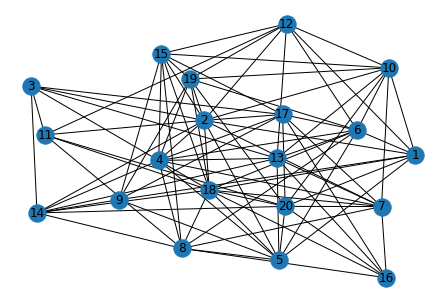

In [0]:
import networkx as nx
import numpy as np

a = Error_graphs[5]
G = nx.Graph(a)

nx.draw(G, with_labels=True)

In [0]:
a,b = p_clique_return(Error_graphs[5],4)
print(a,b)

True [1, 2, 5, 18]


In [0]:
k= 
index = 22
Graph = graph_gen(50)
a,b =p_clique_return(Graph,k)
c,d = np_clique_return(Graph,k)
result = []
for i in range(len(d)):
    result.append(ord(d[i].name) -64)



print(a," ",b,"\n\n",Graph,"\n\n",c," ",result)
Error_graphs[index]

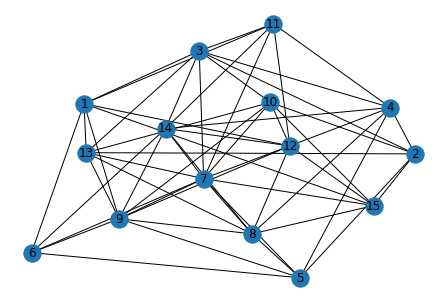

In [0]:
import networkx as nx
import numpy as np

a = Error_graphs[index]
G = nx.Graph(a)

nx.draw(G, with_labels=True)